# <center> Key Influencers on a Borrower's Interest Rate 
<center/> by Matt Hui 

## Data Overview
This document explores a dataset containing interest rates and attributes for approximately 114,000 loan listings collected by lending company, Prosper.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [67]:
#read data
df = pd.read_csv('prosperLoanData.csv')
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [4]:
df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [291]:
df['BorrowerRate'].describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

In [85]:
# ensure all datatypes are correct
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])
df['FirstRecordedCreditLine'] = pd.to_datetime(df['FirstRecordedCreditLine'])

# order categorical variables
ordinal_var_dict = {'CreditGrade': ['NC','HR','E','D','C','B','A','AA'],
                    'LoanStatus': ['Chargedoff', 'Defaulted' 'Past Due (>120 days)', 'Past Due (>91-120 days)', 'Past Due (>61-90 days)', 'Past Due (>31-60 days)', 'Past Due (>16-30 days)', 'Past Due (>1-15 days)',
                                  'Current','FinalPaymentInProgress', 'Completed','Cancelled'],
                    'IncomeRange': ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        df[var] = df[var].astype(ordered_var)
    else: # pre-v0.21
        df[var] = df[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

### What is the structure of your dataset?
There are 113937 listings in the dataset with 81 features. Most variables are numeric in nature, but the variables CreditGrade, LoanStatus, and IncomeRange are ordered factor variables with the following levels.

(worst) ——> (best) <br>
- CreditGrade: NC, HR, E, D, C, B, A, AA <br>
- LoanStatus: Chargedoff, Defaulted, Past Due (>120 days), Past Due (>91-120 days), Past Due (>61-90 days), Past Due (>31-60 days), Past Due (>16-30 days), Past Due (>1-15 days), Current, FinalPaymentInProgress, Completed, Cancelled <br>
- IncomeRange: Not displayed, Not employed, $\$$0, $\$$1-24,999, $\$$25,000-49,999, $\$$50,000-74,999, $\$$75,000-99,999, $\$$100,000+


### What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out what features are best for predicting the borrow's interest rate.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that CreditGrade will have the strongest effect on each borrower's interest: the lower the diamond, the higher the interest rate. I also think that the other characteristics of the borrower, such as employment status and income range, as well as characteristics of the loan itself, such as original loan amount and percent funded, will have effects on the interest rate, though to a much smaller degree than the main effect of CreditGrade.



## Univariate Exploration
I'll start by looking at the distribution of the main variable of interest: interest rate.

## General Trends

### Most loan borrowers make between $\$$25-75,000 of income each year, have a 'C' Credit Grade and typically borrow loans between $\$$4-20,000 at an interest rate of either 15% or 30%.  

Text(0.5, 1.0, 'Interest Rate Frequency')

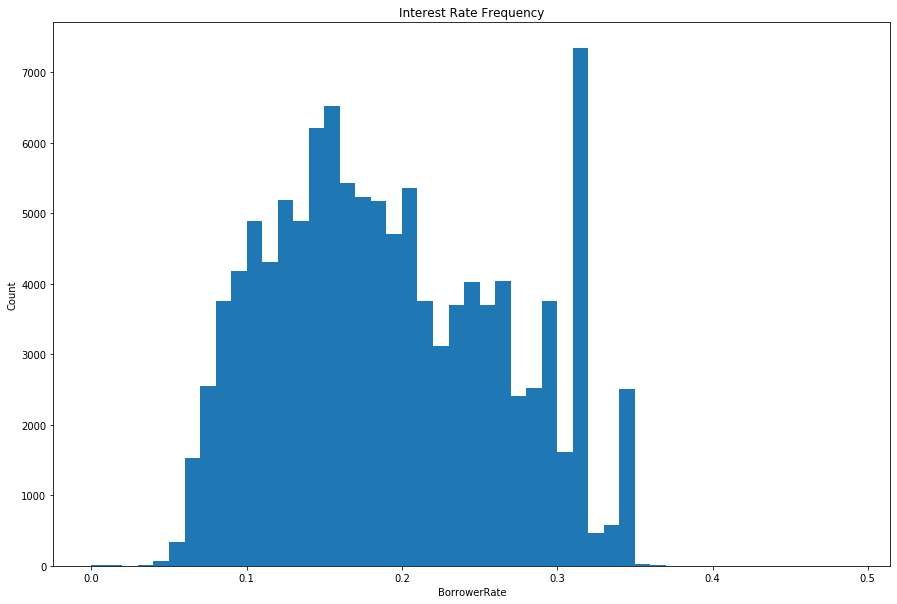

In [300]:
# univariate plot for BorrowerRate
plt.figure(figsize = [15, 10])
bins = np.arange(0.0,0.5,.01)
plt.hist(data = df, x = 'BorrowerRate', bins = bins)
plt.xlabel('BorrowerRate')
plt.ylabel('Count')
plt.title('Interest Rate Frequency')

Text(0.5, 1.0, 'Credit Grade Frequency')

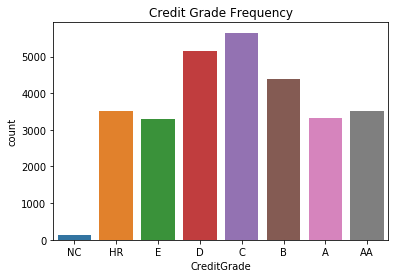

In [301]:
# univariate plot for CreditGrade
sb.countplot(data = df, x = 'CreditGrade')
df['CreditGrade'].value_counts()
plt.title('Credit Grade Frequency')

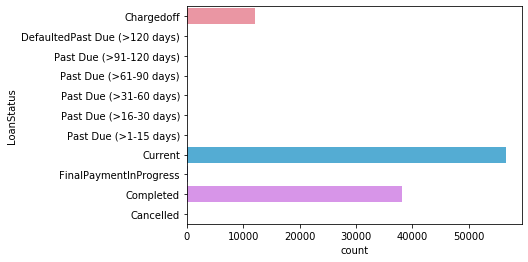

In [9]:
# univariate plot for LoanStatus
sb.countplot(data = df, y = 'LoanStatus')

Text(0.5, 1.0, 'Income Range Frequency')

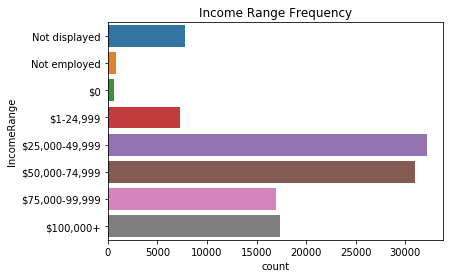

In [302]:
# univariate plot for LoanStatus
sb.countplot(data = df, y = 'IncomeRange')
plt.title('Income Range Frequency')

In [11]:
np.log10(df['LoanOriginalAmount']).describe()

count    113937.000000
mean          3.795130
std           0.345610
min           3.000000
25%           3.602060
50%           3.812913
75%           4.079181
max           4.544068
Name: LoanOriginalAmount, dtype: float64

In [12]:
(df['LoanOriginalAmount']).describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

(array([42754., 22132., 19503.,  6101., 13786.,  4575.,   747.,  3722.,
          137.,   480.]),
 array([ 1000.,  4400.,  7800., 11200., 14600., 18000., 21400., 24800.,
        28200., 31600., 35000.]),
 <a list of 10 Patch objects>)

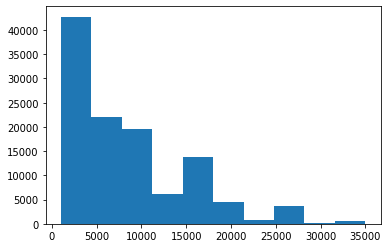

In [13]:
# univariate plot (standard scale) for original loan amount
plt.hist(data = df, x = 'LoanOriginalAmount')

Text(0.5, 1.0, 'Original Loan Amount Frequency')

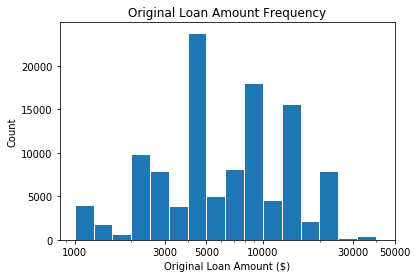

In [303]:
# univariate plot (log scale) for original loan amount
bins = 10**np.arange(3.0,4.6+.1,.1)
ticks = [1000, 3000, 5000, 10000,30000, 50000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins, edgecolor = 'white')
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Original Loan Amount ($)')
plt.ylabel('Count')
plt.title('Original Loan Amount Frequency')

**The data for LoanOriginalAmount is heavily skewed to the right. Applying applying the log transformation, you can see that there is somewhat of a bimodal distribution with a few peaks in the middle, particularly between 400 and 20000.**

(array([5.8237e+04, 3.7061e+04, 1.4299e+04, 3.3980e+03, 6.4800e+02,
        2.4100e+02, 3.3000e+01, 1.1000e+01, 1.0000e+00, 8.0000e+00]),
 array([   0.   ,  225.151,  450.302,  675.453,  900.604, 1125.755,
        1350.906, 1576.057, 1801.208, 2026.359, 2251.51 ]),
 <a list of 10 Patch objects>)

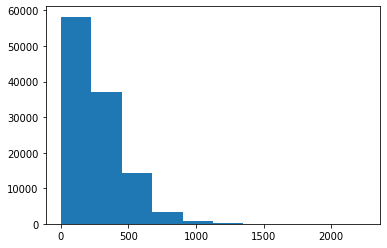

In [15]:
# univariate plot (standard scale) for original loan amount
plt.hist(data = df, x = 'MonthlyLoanPayment')

In [16]:
np.log10(df['MonthlyLoanPayment']).describe()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    1.139370e+05
mean             -inf
std               NaN
min              -inf
25%      2.119322e+00
50%      2.337938e+00
75%      2.570052e+00
max      3.352474e+00
Name: MonthlyLoanPayment, dtype: float64

In [17]:
(df['MonthlyLoanPayment']).describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

Text(0.5, 1.0, 'Monthly Loan Payment Frequency')

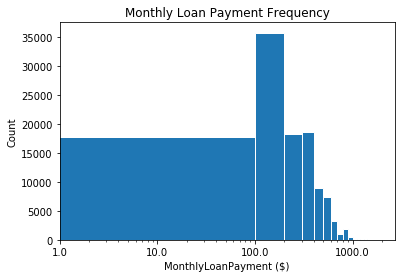

In [304]:
# univariate plot (log scale) for monthly loan payment
bins = np.arange(df.MonthlyLoanPayment.min(),df.MonthlyLoanPayment.max()+100,100)
plt.hist(data = df, x = 'MonthlyLoanPayment', bins = bins, edgecolor = 'white')
plt.xscale('log')
ticks = [1,10,100,1000]
plt.xticks(ticks, [float(x) for x in ticks])
plt.xlabel('MonthlyLoanPayment ($)')
plt.ylabel('Count')
plt.title('Monthly Loan Payment Frequency')

**The data for MonthlyLoanPayment is skewed to the right.  After applying log transformation, you can see that the most common monthly loan payment amount is between $\$$100-200.**  

### The most common loan is one that is fully funded by the lender with an interest rate of 30%

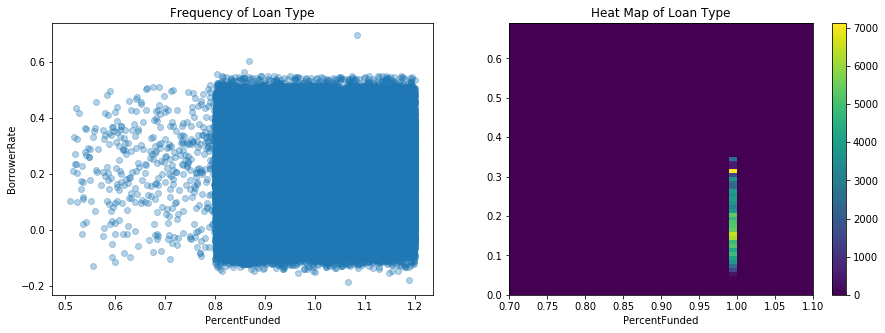

In [322]:
# biivariate plot between BorrowRate and PercentFunded
#What is the proportion of loan type based on interest rate and borrow rate?
plt.figure(figsize = [15, 5])


bins_x = np.arange(0.7, 1.0+.1, .01)
bins_y = np.arange(0.0, 0.6+.1, .01)
df['PercentFunded'] = df['PercentFunded'].astype(float)
df['BorrowerRate'] = df['BorrowerRate'].astype(float)

plt.subplot(1, 2, 1)
sb.regplot(data = df, x = 'PercentFunded', y = 'BorrowerRate', fit_reg = False, x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})
plt.title('Frequency of Loan Type')

plt.subplot(1, 2, 2)
plt.hist2d(data = df, x = 'PercentFunded', y = 'BorrowerRate',bins = [bins_x,bins_y])
plt.title('Heat Map of Loan Type')
plt.xlabel('PercentFunded')
plt.colorbar()


**It seems like the most common type of loan is one that is fully funded by the lender and with an interest rate of about 30%**.  

## Bivariate Exploration
Next, I'll check the relationship between key numerical & categorical values that describe a borrower's demographic/behavioral context with a borrower's interest rate.

### Interest Rate is generally most correlated with Estimated Return, Prosper Score, and Loan Original Amount

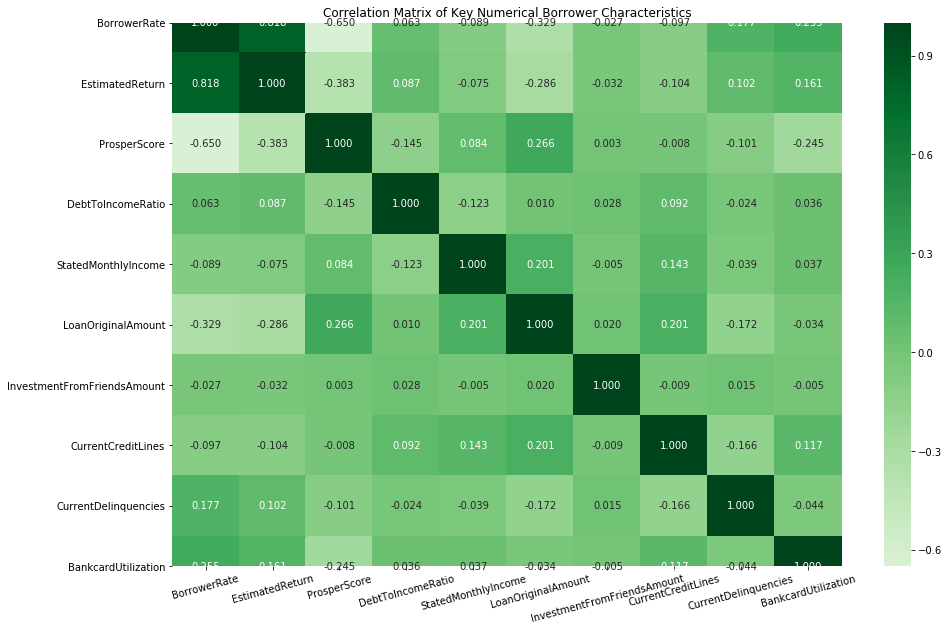

In [313]:
numeric_vars = ['BorrowerRate', 'EstimatedReturn', 'ProsperScore', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'InvestmentFromFriendsAmount','CurrentCreditLines','CurrentDelinquencies','BankcardUtilization']
plt.figure(figsize = [15, 10])
ax = plt.axes()
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'Greens', center = 0, ax = ax)
plt.xticks(rotation = 15)
ax.set_title('Correlation Matrix of Key Numerical Borrower Characteristics')
plt.show()

### The greater amount of investment into the loan there is from friends, the less favorable loan is to the lender

Text(0.5, 1.0, 'Relationship between Amount of Investment from Friends and Estimated Return off Loan')

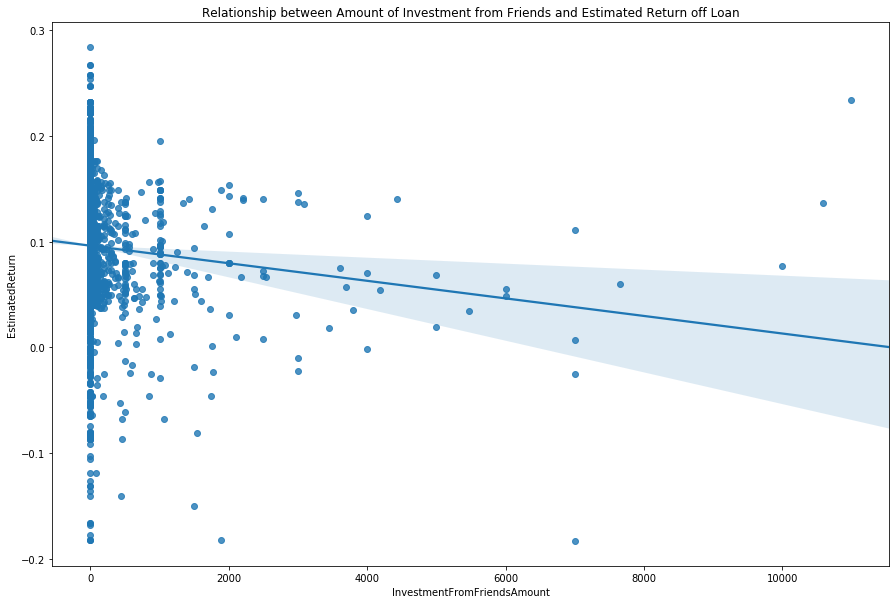

In [314]:
# biivariate plot between EstimatedReturn and InvestmentFromFriendsAmount
#Is there a relationship between amount of money invested by friends and expected return to lender? 
#Should lenders see investment from friends as a positive or negative?
plt.figure(figsize = [15, 10])
sb.regplot(data = df, x = 'InvestmentFromFriendsAmount', y = 'EstimatedReturn')
plt.title('Relationship between Amount of Investment from Friends and Estimated Return off Loan')

**There seems to be a slight negative correlation between investment amount from friends and estimated return. However, the outliers might be biasing the data, so let's see what happens when we remove them.**  

234


Text(0.5, 1.0, 'Relationship between Amount of Investment from Friends and Estimated Return off Loan')

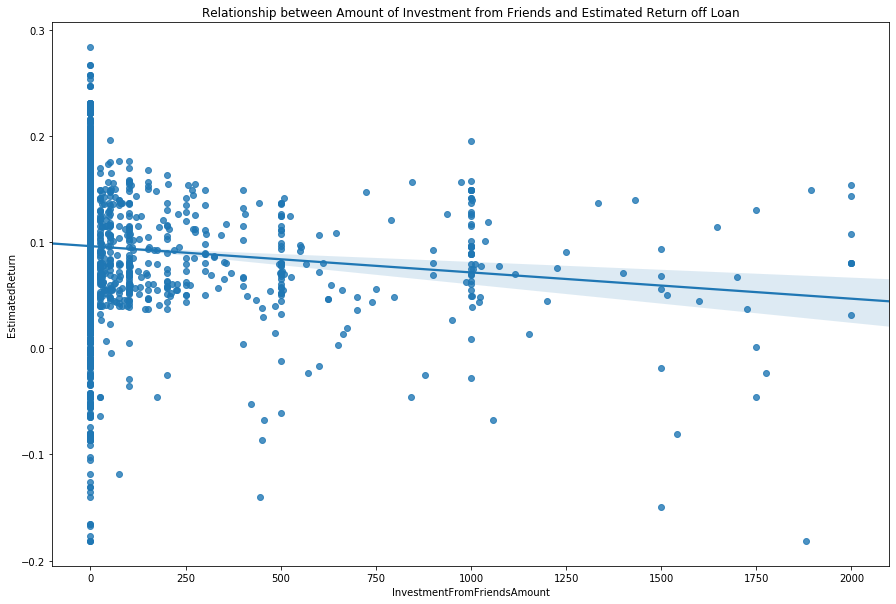

In [315]:
# remove outliers to see if it affects regression line, using criteria eyeballed from the plot
plt.figure(figsize = [15, 10])
high_outliers = (df['InvestmentFromFriendsAmount'] > 2000)
print(high_outliers.sum())
outliers_removed = df.loc[-high_outliers,:]
sb.regplot(data = outliers_removed, x = 'InvestmentFromFriendsAmount', y = 'EstimatedReturn')
plt.title('Relationship between Amount of Investment from Friends and Estimated Return off Loan')

**Even after with outliers removed, there seems to be a slight negative correlation between investment amount from friends and estimated return. Thus, it seems that the greater amount of investment into the loan there is from friends, the less favorable loan is to the lender.**

## Effects on Interest Rate

### The better a borrower's Credit Grade, the lower their interest rate on a loan

Text(0.5, 1.0, 'Relationship between Credit Grade and Interest Rate')

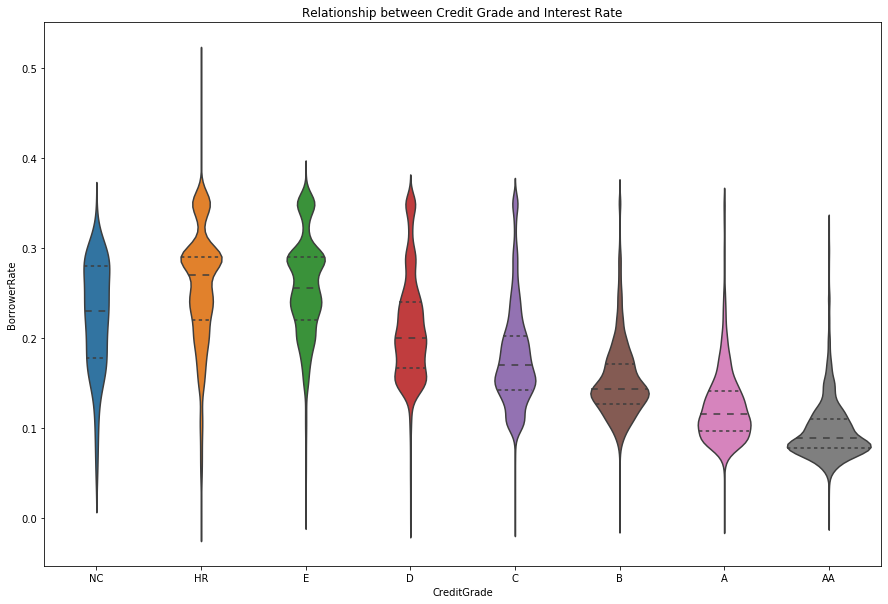

In [323]:
# biivariate plot between BorrowerRate and CreditGrade
#Is there a relationship between credit grade and interest rate?

plt.figure(figsize = [15, 10])
sb.violinplot(data = df, x = 'CreditGrade', y = 'BorrowerRate', inner = 'quartile')
plt.title('Relationship between Credit Grade and Interest Rate')

**It's very clear here that the higher your Credit Grade, the lower your interest rate.  Obviously, someone with high risk (HR) credit score will be susceptible to having an extremely high interest, which is shown as one of the extreme points in the HR column.**

### Borrowers with a higher Debt:Income Ratio will have a slightly higher interest rate

Text(0.5, 1.0, 'Relationshihp between Debt-to-Income Ratio and Interest Rate')

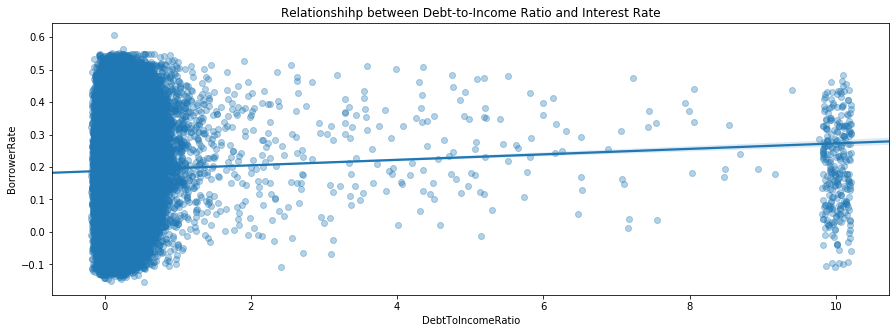

In [324]:
# biivariate plot between DebtToIncomeRatio and BorrowerRate
# Is there a trend between a borrower's debt:income ratio and interest rate they get?

plt.figure(figsize = [15, 5])
sb.regplot(data = df, x = 'DebtToIncomeRatio', y = 'BorrowerRate', x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3}) 
plt.title('Relationshihp between Debt-to-Income Ratio and Interest Rate')

**Based on regression plot above, there seems to be slight positive trend between debt:income ratio and interest rate.  Thus, the greater your debt:income ratio, your interest rate is likely to be a little higher.**

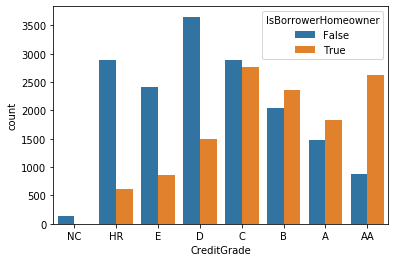

In [25]:
# biivariate plot between IsBorrowerHomeOwner and CreditGrade
#Is it a trend between being a homeowner and the type of credit grade you have?

sb.countplot(data = df, x = 'CreditGrade', hue = 'IsBorrowerHomeowner')

**As shown in the clustered barchart above, typically being a homeowner is associated with having a higher credit score.**  

### A borrower's interest rate is more impacted by a person's income range compared to their home ownership

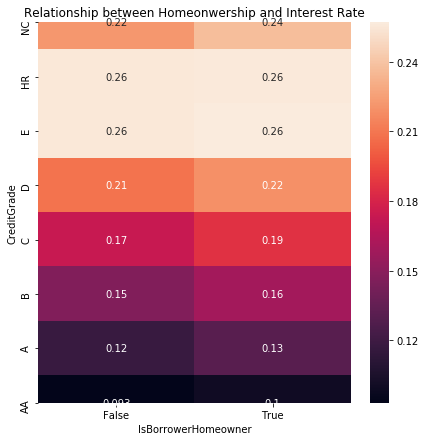

In [329]:
# biivariate plot between IsBorrowerHomeOwner and CreditGrade and Interest Rate
#Is there an affect of borrower being a homeowner on interest rate across credit grade groups?

plt.figure(figsize = [7,7])
homeowner_counts = df.groupby(['CreditGrade','IsBorrowerHomeowner']).mean()
borrowerrate_counts = homeowner_counts['BorrowerRate']
borrowerrate_counts = borrowerrate_counts.reset_index(name = 'count')
borrowerrate_counts = borrowerrate_counts.pivot(index = 'CreditGrade', columns = 'IsBorrowerHomeowner', values = 'count')
sb.heatmap(borrowerrate_counts, annot = True)
plt.title('Relationship between Homeonwership and Interest Rate');


**As shown in the heat map above, there is not much difference in interest rate based on that person being a homeowner or not. Suprisingly, those that are homeowners have a higher average interest rate than those that are not homeowners**

Text(0.5, 0.98, 'Relationship between Income Range and Interest Rate')

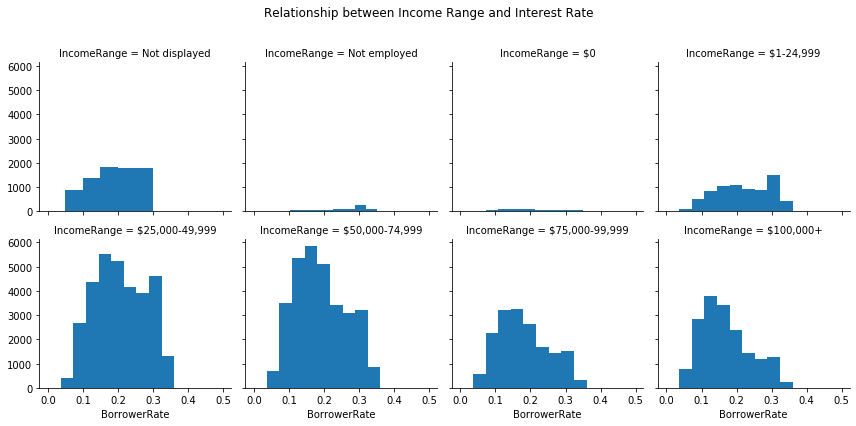

In [338]:
#bivariate plot between BorrowerRate across IncomeRanges
#Does income bracket affect the frequency of levels of interest rates?

g = sb.FacetGrid(data = df, col = 'IncomeRange', col_wrap = 4)
g.map(plt.hist, 'BorrowerRate')
plt.subplots_adjust(top=.85)
g.fig.suptitle('Relationship between Income Range and Interest Rate')

**Based on the FacetGrid chart above, there somewhat of a trend between Income Range and interest rate above. For anyone that makes above $\$$25,000 a year, the frequency of interest rates are about the same distribution with an interest between 0.1 and 0.2 being the most common and anything above 0.2 and below 0.1 being less common.  It is quite clear that if you make below $\$$25,000 a year, you generally have higher interest rate with 0.3 or above being most common.**

## Multivariate Exploration
Lastly, I'll see which of these categorical and numerical values have the greatest impact on interest rate, including any combinations of traits/charateristics of a borrower that have an disproportionate impact on a borrower's interest rate.

([<matplotlib.axis.XTick at 0x1b2e1f5390>,
 <a list of 6 Text xticklabel objects>)

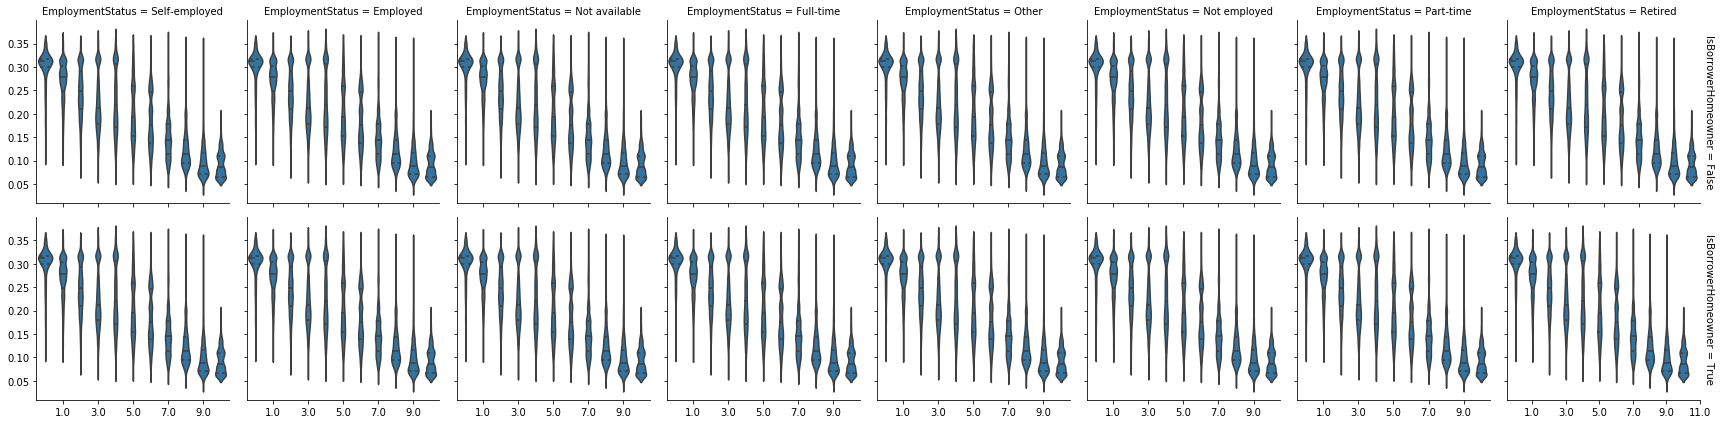

In [225]:
# multivariate plot between EmploymentStatus, ProsperScore, IsBorrowerHomeowner and BorrowerRate 
#Does home ownership and employment status have a significant affect on interest rate

bins_x = np.arange(1, 10+1, 2)
bins_y = np.arange(0.0, 0.5+.1, .01)
g = sb.FacetGrid(data = df, col = 'EmploymentStatus', row = 'IsBorrowerHomeowner', size = 3,
                margin_titles = True)
g.map(sb.violinplot, data = df, x = 'ProsperScore', y ='BorrowerRate', inner = 'quartile', bins = [bins_x,bins_y])
ticks = [1,3,5,7,9,11]
plt.xticks(ticks, [float(x) for x in ticks])

**When comparing the columns with each other, the distribution of interest rate is about the same across employment categories, with those that have lower ProsperScores having higher interest rates. Similarly, being a homeowner doesn't really have much of an impact on borrower rate.  As you can see when you compare rows, the distribution of interest rate is about the same betweeen populations that are homeowners versus not homeowners.**

### A borrower's Credit Grade has a stronger influence on interest rate than original loan amount

Text(0.5, 1.0, 'Effect of Credit Grade vs. Original Loan Amount on Interest Rate')

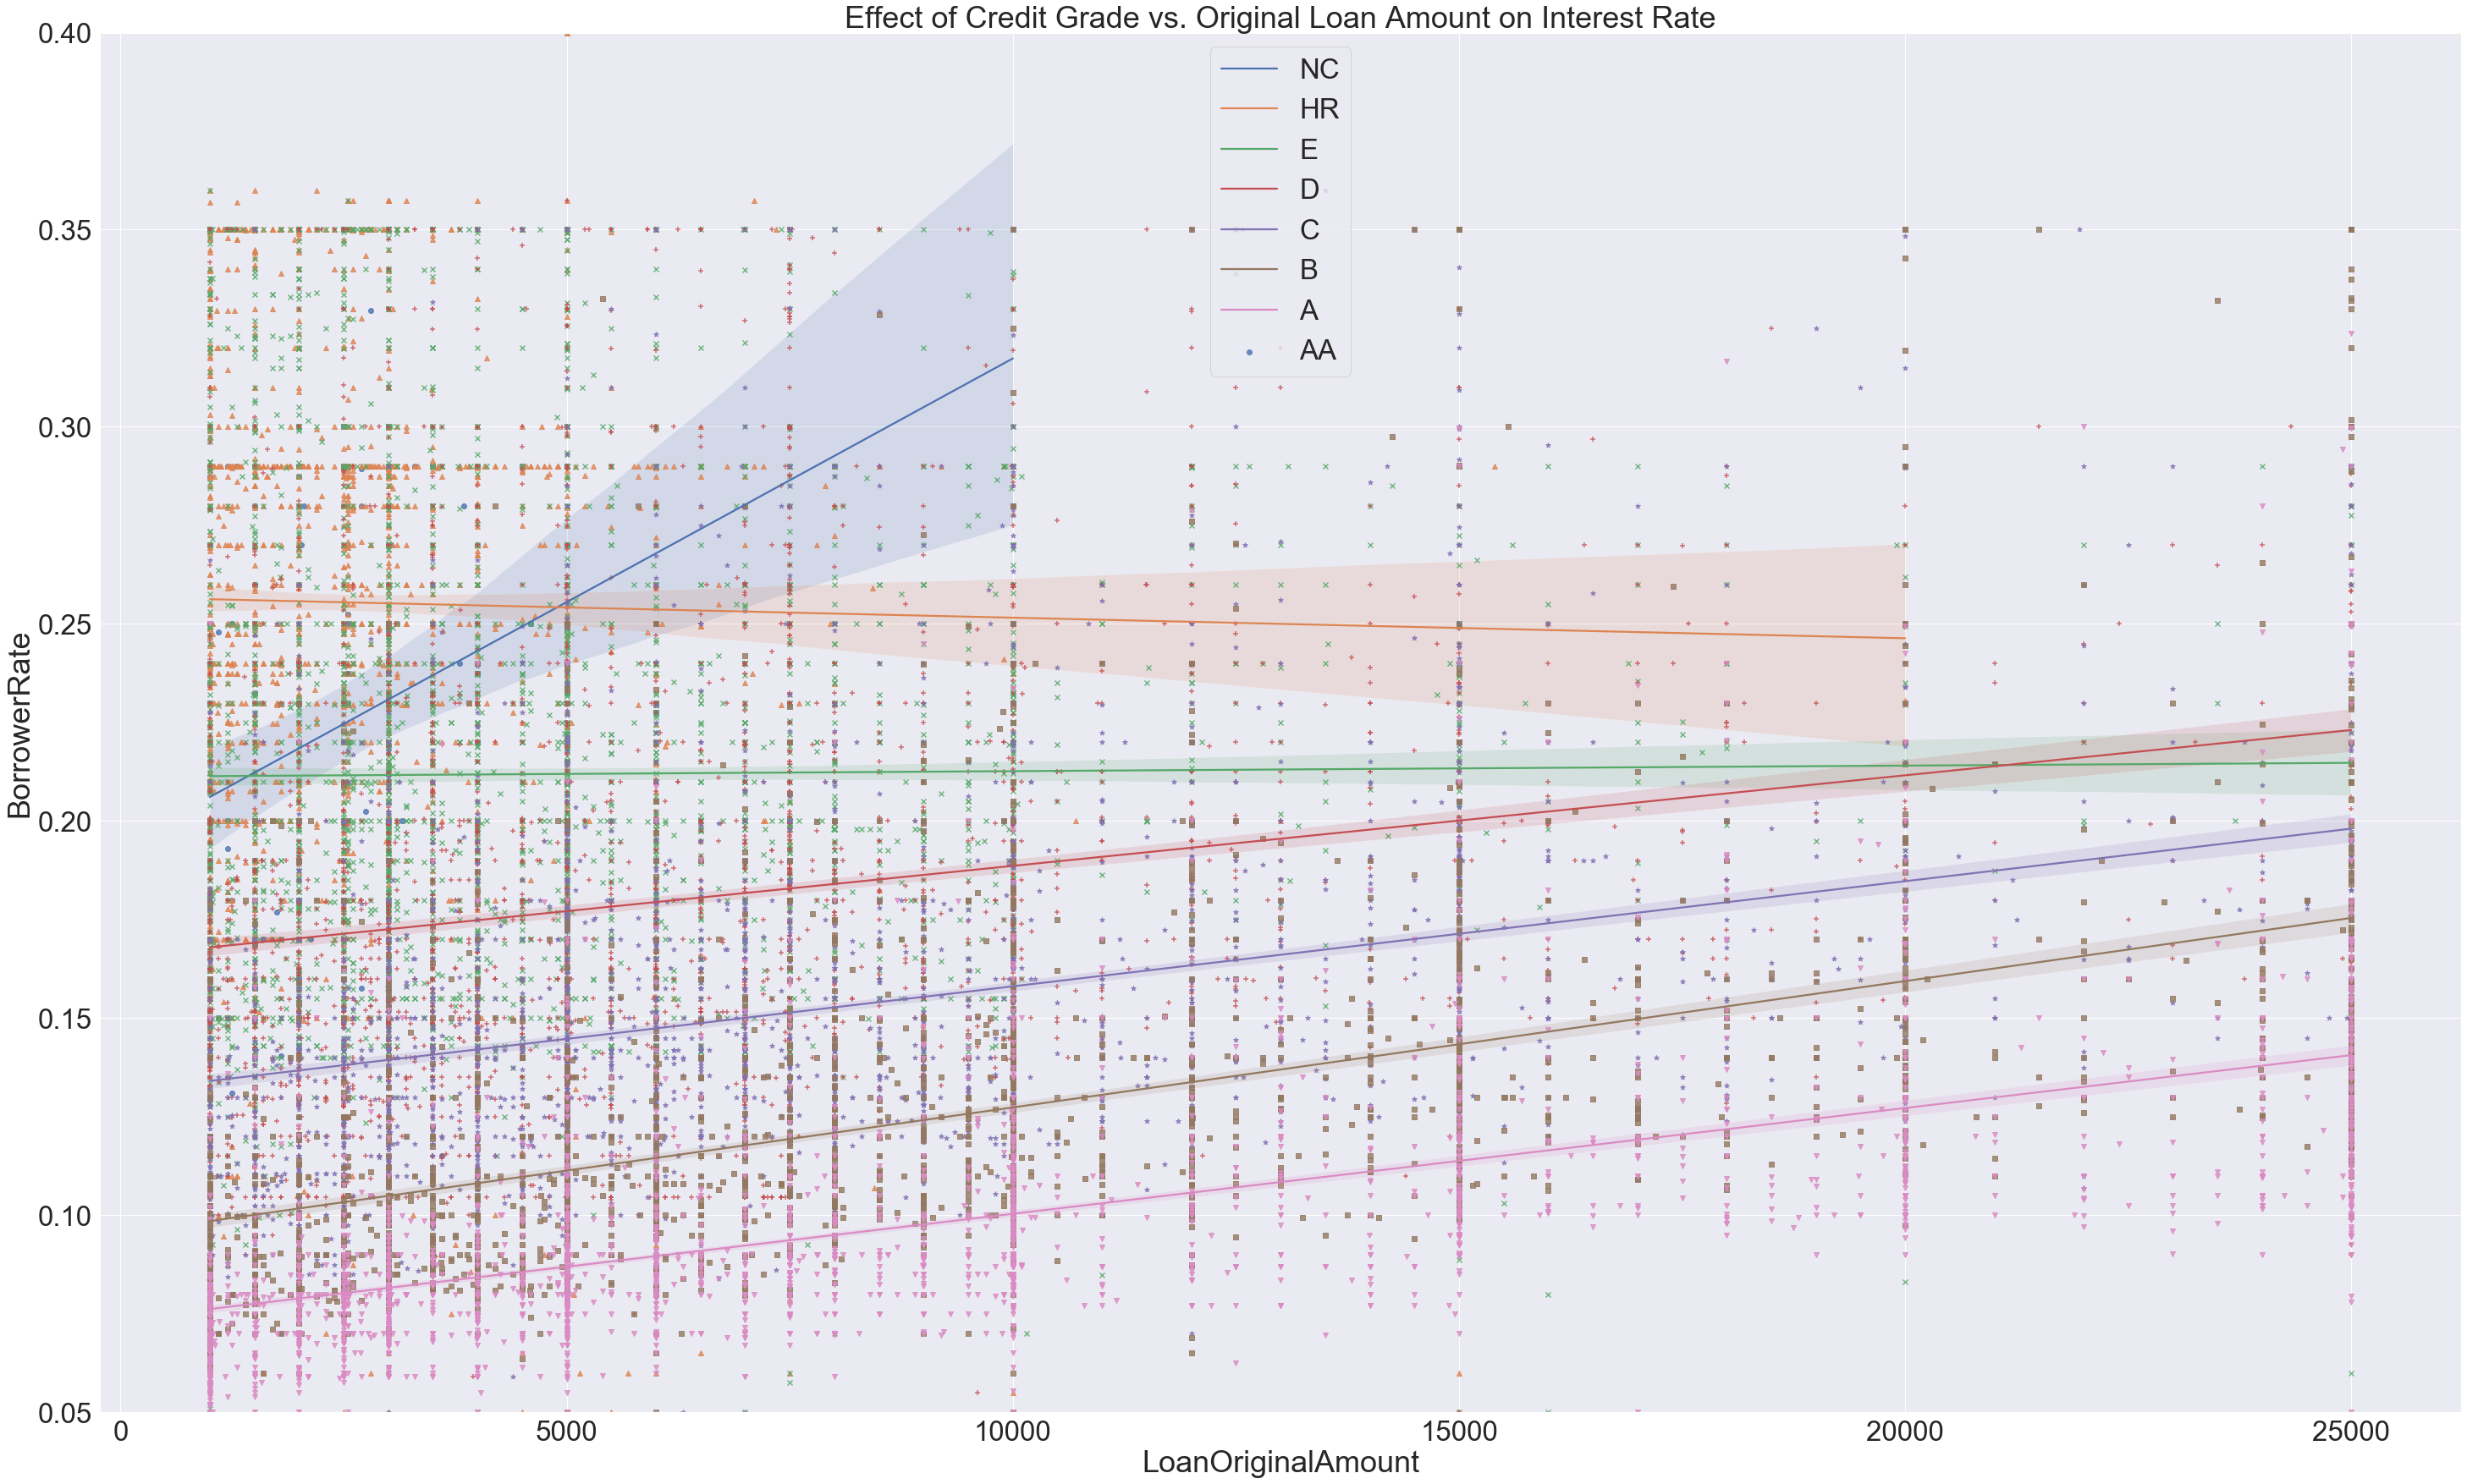

In [345]:
# multivariate plot between BorrowerRate, LoanOriginalAmount, CreditGrade,
#How does borrower's loan size affect interest rate independent of credit history?

plt.figure(figsize = [50, 30])
credit_markers = [['NC', 'o'],
                ['HR','^'],
                ['D', 'x'],
                ['C', '+'],
                ['B', '*'],
                ['A', 's'],
                ['AA', 'v']]

for credit, marker in credit_markers:
    df_credit = df[df['CreditGrade'] == credit]
    sb.regplot(data = df_credit, x = 'LoanOriginalAmount', y = 'BorrowerRate', marker = marker, truncate = True)
plt.legend(['NC','HR','E','D','C','B','A','AA'])
plt.ylim(0.05,0.4)
plt.title('Effect of Credit Grade vs. Original Loan Amount on Interest Rate')


**Based on graph above (after removing outliers), it seems that if your credit score is worse than D your loan original amount does not have an affect on interest rate.  In other words, if your credit score is D or better, you typically have higher interest rates as your original loan amount (initial amount borrowed) increases.  This makes sense since financial institutions want to cover for the higher stakes.  However, if your credit score drops below D, your interest rate stays about the same no matter how much or less your original loan amount is.  Moreover, if you don't have any credit, you are susceptible to have interest rates jump up at a higher rate as your original loan amount increases.  Therefore, credit score has a strong impact on interest rate than original loan amount once your credit score drops below a D.**

In [221]:
df['BorrowerRate'].describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

### Extreme debt:income ratios plus bank card utilization rates lead to higher interest rates

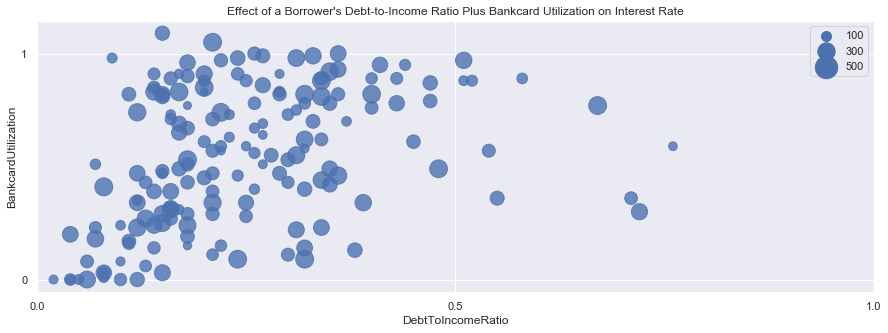

In [372]:
# multivariate plot between DebtToIncomeRatio, BankcardUtilization, BorrowerRate 
#How does average interest rate change based on debt:income ratio and bank card utilization?

plt.figure(figsize = [15,5])

np.random.seed(2018)
sample = np.random.choice(df.shape[0], 200, replace = False)
df_subset = df.loc[sample]

sb.regplot(data = df_subset, x = 'DebtToIncomeRatio', y = 'BankcardUtilization', fit_reg = False, 
           scatter_kws = {'s': df['BorrowerRate']*1000}, truncate = True)

plt.xlim(0,1)

sizes = [100, 300, 500]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes)
plt.title('Effect of a Borrower\'s Debt-to-Income Ratio Plus Bankcard Utilization on Interest Rate')
sb.set(font_scale = 8)

**Based on the graph above, it's evident that interest rate seems to be greater when the borrower's debt:income ratio is below 0.2 and bank card utilization is between 20 and 40% as well as when debt:income ratio is between 0.3 and 0.4 and bank card utilization is between 40 and 60% or 80 and 100%.  In other words, assuming most borrowers don't have debt:income ratio great than 0.4, the interest rate tends to be greater and closer to 30% at the extremes of debt:income ratio and bank card utilization.**

### Borrowers that have higher Income Ranges will likely have lower interest rates, regardless their loan status

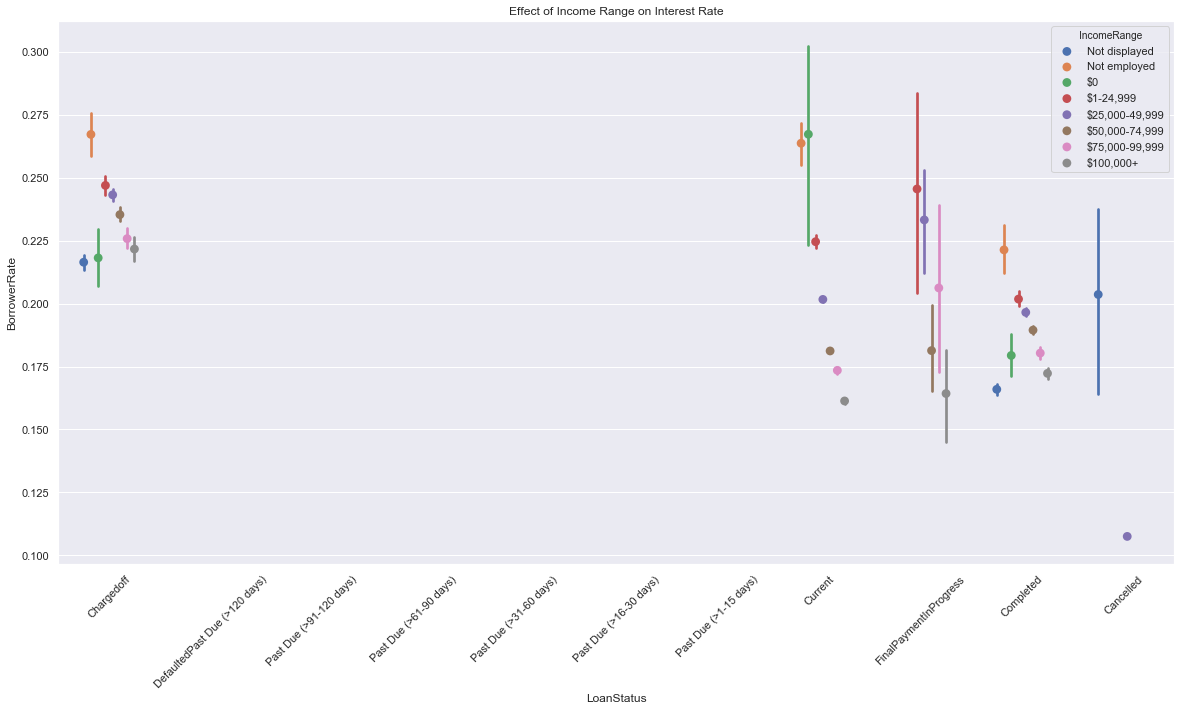

In [358]:
# multivariate plot between IncomeRange, BorrowerRate, Loan Status 
#Does income range make a difference on interest rate when a borrower is in the same loan status?


plt.figure(figsize = [20,10])
plt.xticks(rotation=45)

ax = sb.pointplot(data = df, x = 'LoanStatus', y = 'BorrowerRate', hue = 'IncomeRange',
                  dodge = 0.5, linestyles = "")
plt.title('Effect of Income Range on Interest Rate')
sb.set(font_scale = 0)

**Based on the pointplot above, it seems that borrowers that have a higher income status tend to have lower interest rates across all loan status categories that have data.  The only unique observations are: 1) For the chargedoff and completed loan status categories, if a borrower is in the $\$$0 income range, their interest rate tends to be as low as those that are in the $\$$ 100,000+ income range 2) For the final payment in progress loan status category, those borrowers in a $\$$75,000-99,999 income range had a higher average interest rate than those in the $\$$50,000-74,999 income range.**

### Out of all categorical variables, a borrower's Credit Grade has strongest influence on interest rate 

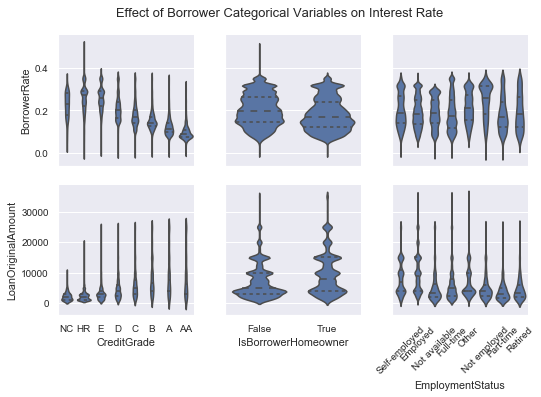

In [371]:
# multivariate plot between CreditGrade, IsBorrowerHomeowner, EmploymentStatus
#What categorical variable has strongest affect on interest rate?


g = sb.PairGrid(data = df, x_vars = ['CreditGrade', 'IsBorrowerHomeowner', 'EmploymentStatus'],
                y_vars = ['BorrowerRate', 'LoanOriginalAmount'])
g.map(sb.violinplot, inner = 'quartile')
plt.xticks(rotation=45)
plt.subplots_adjust(top=.9)
g.fig.suptitle('Effect of Borrower Categorical Variables on Interest Rate')
sb.set(font_scale = 1)

**Based on the PairGrid above, it seems like CreditGrade has the greatest affect on interest rate and original loan amount.   Being a homeowner does not drastically change the interest rate and original loan amount; however, employment status does have a slight impact on interest rate and original loan amount.  If you are not employed, you will difintely hae a higher interest rate as a borrower; however, this impact does not necessarily hold true for loan original amount.  Based on bottom right graph of the grid, if you are self-employed or employed, it is slightly more likely to have a higher original loan amount.**

### Monthly Income Amount and Original Loan Amount do not have a compound effect on interest rate

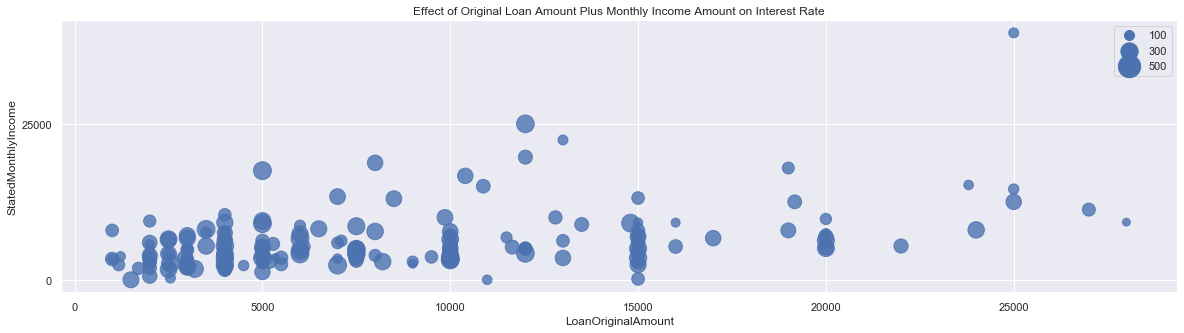

In [379]:
# multivariate plot between StatedMonthlyIncome, LoanOriginalAmount, BorrowerRate
#How does someone's monthly income and loan amount affect their interest rate?

plt.figure(figsize = [20,5])

np.random.seed(2019)
sample = np.random.choice(df.shape[0], 200, replace = False)
df_subset = df.loc[sample]

sb.regplot(data = df_subset, x = 'LoanOriginalAmount', y = 'StatedMonthlyIncome', fit_reg = False, 
           scatter_kws = {'s': df['BorrowerRate']*1000}, truncate = True)


sizes = [100, 300, 500]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes)
plt.title('Effect of Original Loan Amount Plus Monthly Income Amount on Interest Rate')
sb.set(font_scale = 5)

**There doesn't seem to be a clear combined effect that loan original amount and stated monthly income have on interest rate.  No matter if stated monthly income or loan original amount increases or decreases, there's not a clear trend on how interest rate changes. Thus, we can conclude that these two don't really have a compounding affect on interest rate.**